<a href="https://colab.research.google.com/github/divyakopalle/N1Health_Data_Challenge/blob/main/N1_Health_Challenege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import sqlite3
import pandas as pd


#Question 1 & 2

connection = sqlite3.connect("data_analyst_challenge.db")

cur = connection.cursor()

#Update dates in roster_2 to match YYYY-MM-DD format in other rosters
cur.execute("""UPDATE roster_2 SET dob = substr(dob, 7, 4) || '-' || substr(dob, 1,2) || '-' || substr(dob, 4,2);""")

#UNION all 5 rosters, specify column names, and filter each by eligibility date
cur.execute("""CREATE TABLE IF NOT EXISTS std_member_info AS SELECT Person_Id as member_id,
First_Name as member_first_name,
Last_Name as member_last_name,
Dob as date_of_birth,
Street_Address as main_address,
City as city,
State as state,
Zip as zip_code,
payer 
FROM roster_1
WHERE eligibility_start_date <= '2022-01-04'


UNION ALL SELECT
Person_Id as member_id,
First_Name as member_first_name,
Last_Name as member_last_name,
Dob as date_of_birth,
Street_Address as main_address,
City as city,
State as state,
Zip as zip_code,
payer 
FROM roster_2
WHERE eligibility_start_date <= '2022-01-04'

UNION ALL SELECT
Person_Id as member_id,
First_Name as member_first_name,
Last_Name as member_last_name,
Dob as date_of_birth,
Street_Address as main_address,
City as city,
State as state,
Zip as zip_code,
payer 
FROM roster_3
WHERE eligibility_start_date <= '2022-01-04'

UNION ALL SELECT
Person_Id as member_id,
First_Name as member_first_name,
Last_Name as member_last_name,
Dob as date_of_birth,
Street_Address as main_address,
City as city,
State as state,
Zip as zip_code,
payer 
FROM roster_4
WHERE eligibility_start_date <= '2022-01-04'

UNION ALL SELECT
Person_Id as member_id,
First_Name as member_first_name,
Last_Name as member_last_name,
Dob as date_of_birth,
Street_Address as main_address,
City as city,
State as state,
Zip as zip_code,
payer 
FROM roster_5
WHERE eligibility_start_date <= '2022-01-04'""")



connection.commit()




# Print table
print (pd.read_sql_query("SELECT * FROM std_member_info", connection))




print(cur.fetchall())


connection.close()

      member_id member_first_name member_last_name date_of_birth  \
0      15340001            Daniel            Smith    2017-04-27   
1      15340006              Todd           Austin    1934-01-06   
2      15340022             Leroy           Wilson    1960-09-20   
3      15340042            Monica         Elmquist    1981-09-02   
4      15340052             Betty             Read    1977-09-23   
...         ...               ...              ...           ...   
84927  15539867           Shannon           Watson    1942-04-07   
84928  15539912          Clifford             Cook    1968-03-26   
84929  15539921         Ernestina            Clark    1933-12-06   
84930  15539943          Jennifer            Stitt    1957-10-21   
84931  15539947            Joseph         Martinez    1969-07-13   

                             main_address                city       state  \
0             1505 Alvarez Spur Suite 902    Lake Sharonburgh  California   
1                         473

In [4]:
connection = sqlite3.connect("data_analyst_challenge.db")

cur = connection.cursor()

# Union member info with model scores tables
cur.execute("""CREATE TABLE IF NOT EXISTS sum_stats AS SELECT * 
FROM std_member_info
LEFT JOIN model_scores_by_zip ON std_member_info.zip_code = model_scores_by_zip.zcta """)


# 3a. Distinct members eligible in April 2022
cur.execute("SELECT COUNT(DISTINCT member_id) FROM std_member_info")

print('Distinct members eligible in April 2022:')
print(cur.fetchall())

# 3b. Members included more than once

# Create table only containing member_id's that show up more than once
cur.execute("""CREATE TABLE IF NOT EXISTS duplicates AS SELECT member_id, COUNT(*) 

FROM std_member_info
GROUP BY member_id
HAVING COUNT (member_id) >1 """)

# Print out count of duplicate member id's from table
cur.execute("SELECT COUNT(member_id) FROM duplicates")

print('Members included more than once:')
print(cur.fetchall())

# 3c.Breakdown of members by payer

cur.execute("""SELECT payer, COUNT(*)

FROM std_member_info
GROUP BY payer """)

print("Breakdown of Members by payer:")
print(cur.fetchall())

# 3d.Members who live in a zip code with food access score lower than 2

cur.execute(""" CREATE TABLE IF NOT EXISTS low_food AS SELECT member_id FROM sum_stats
WHERE  sum_stats.food_access_score < 2
""")

cur.execute("SELECT COUNT(member_id) FROM low_food")

print('Members who live in a. zip code with food access score lower than 2:')
print(cur.fetchall())

# 3e. Average social isolation score

cur.execute(""" SELECT avg(social_isolation_score) FROM sum_stats""")
print('Average Social Isolation score across members:')
print(cur.fetchall())

#3f. Members who live in zip code with higest algorex_sdoh_composite_score
# cur.execute("""SELECT MAX (algorex_sdoh_composite_score) FROM sum_stats""")

cur.execute("""SELECT sum_stats.member_id FROM sum_stats
WHERE sum_stats.algorex_sdoh_composite_score = (SELECT MAX(sum_stats.algorex_sdoh_composite_score) FROM sum_stats) """ )

print('Members who live in zip code with highest algorex sdoh composite score')
print(cur.fetchall())

Distinct members eligible in April 2022:
[(71157,)]
Members included more than once:
[(13775,)]
Breakdown of Members by payer:
[('Madv', 31878), ('Mdcd', 53054)]
Members who live in a. zip code with food access score lower than 2:
[(6608,)]
Average Social Isolation score across members:
[(3.064406113125956,)]
Members who live in zip code with highest algorex sdoh composite score
[('15404143',), ('15418054',), ('15537550',), ('15391076',), ('15363143',), ('15375855',), ('15456560',), ('15462579',), ('15340102',), ('15346807',), ('15389381',), ('15414827',), ('15482255',), ('15484216',), ('15486908',), ('15489640',), ('15514403',), ('15532243',), ('15539805',), ('15359217',), ('15447186',), ('15487938',), ('15493624',), ('15497844',), ('15506131',), ('15387928',), ('15389759',), ('15403845',), ('15417526',), ('15459547',), ('15495072',), ('15499581',), ('15525968',), ('15363143',), ('15375855',), ('15456560',), ('15340102',), ('15346807',), ('15389381',), ('15482255',), ('15484216',), ('

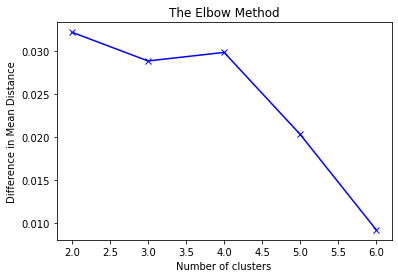

cluster 1


neighborhood_stress_score      0.265307
social_isolation_score         3.330170
transportation_access_score    4.309297
food_access_score              3.525602
unstable_housing_score         3.022741
state_govt_assistance          0.768979
homeless_indicator             7.058801
dtype: float64

cluster 2


neighborhood_stress_score     -0.491657
social_isolation_score         2.630329
transportation_access_score    4.143515
food_access_score              2.784939
unstable_housing_score         1.875563
state_govt_assistance          0.338415
homeless_indicator             7.339112
dtype: float64

cluster 3


neighborhood_stress_score      0.702471
social_isolation_score         4.333782
transportation_access_score    4.400072
food_access_score              3.285652
unstable_housing_score         5.344900
state_govt_assistance          1.084788
homeless_indicator             6.745485
dtype: float64

Percentage of members in cluster 1
46.47482692035982
Percentage of members in cluster 2
47.13653275561626
Percentage of members in cluster 3
6.388640324023926


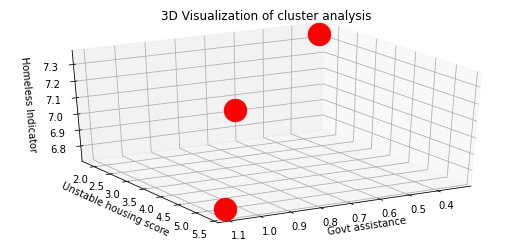

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import math 

# K-means clustering analysis


connection = sqlite3.connect("data_analyst_challenge.db")


# Convert sum_stats table to pandas data frame
df= pd.read_sql_query("SELECT * FROM sum_stats", connection)

# Specificy columns to work with for K-means clustering
X = df.iloc[:,12:19].values


# Elbow method to find optimal number of clusters
distortions = []
distortions_root = []
distance_diff = []
K = range(2, 8)
A= range(2,7)



#Finding mean sqaured distances for each number of clusters
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    #calculates average sqaured distance
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
    
                                        'euclidean'), axis=1)) / X.shape[0])
  

#take sqaure root of mean sqaured distances
for x in range(len(distortions)):
    distortions_root.append(math.sqrt(distortions[x]))
   


#find difference between mean distance
for x in range (len(distortions)-1):
  distance_diff.append(distortions_root[x]-distortions_root[x+1])
  
# Plot difference in mean distances
plt.plot(A, distance_diff, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Difference in Mean Distance')
plt.title('The Elbow Method')
plt.show()



#run K-means with 3 clusters
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)


# Create column to specify cluster
df['cluster'] = y 


#Create data frame for each cluster
c1 = df[df.cluster==0]
c2 = df[df.cluster==1]
c3 = df[df.cluster==2]


#Find average values for scores for each cluster
c1_means = c1[["neighborhood_stress_score","social_isolation_score","transportation_access_score","food_access_score","unstable_housing_score","state_govt_assistance","homeless_indicator"]].mean()

c2_means = c2[["neighborhood_stress_score","social_isolation_score","transportation_access_score","food_access_score","unstable_housing_score","state_govt_assistance","homeless_indicator"]].mean()

c3_means = c3[["neighborhood_stress_score","social_isolation_score","transportation_access_score","food_access_score","unstable_housing_score","state_govt_assistance","homeless_indicator"]].mean()

#Print out average scores for each cluster
print('cluster 1')
display(c1_means)
print('cluster 2')
display(c2_means)
print('cluster 3')
display(c3_means)

#Print out percentage of members apart of each cluster
print("Percentage of members in cluster 1")
print((len(c1)/len(X))*100)

print("Percentage of members in cluster 2")
print((len(c2)/len(X))*100)

print("Percentage of members in cluster 3")
print((len(c3)/len(X))*100)



# 3d plot of clusters (state_gov_assistance,unstable_housing_score,homeless_indicator)


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("Govt assistance", fontsize=10, rotation=150)
ax.set_ylabel("Unstable housing score", fontsize=10)
ax.set_zlabel("Homeless Indicator", fontsize=10, rotation=60)

ax.azim = 60
ax.dist = 10
ax.elev = 30

ax.scatter(1.084, 5.344, 6.745, c='red', s=500)
ax.scatter(0.338, 1.875, 7.339, c='red', s=500)
ax.scatter(0.768, 3.022, 7.058, c='red', s=500)


plt.title("3D Visualization of cluster analysis")

plt.show()



